In [10]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# x_np = np.array([1,2,3,4,5])
# y_np = np.array([3*i + 1 for i in x_np])

# x = torch.from_numpy(x_np)
# y = torch.from_numpy(y_np)

# parameter
n = 100
a = 2
b = 1
learningRate = 0.01
epochs = 1000

# Data
x = torch.randn(100, 1)
y = a * x + b

# Model
class myLinear(nn.Module):
    def __init__(self, rows, cols):
        super(myLinear, self).__init__()
        self.linear = torch.nn.Linear(rows, cols)

    def forward(self, x):
        return self.linear(x)

# Training
model = myLinear(1, 1)

if torch.cuda.is_available():
    model.cuda()

print(f'cuda is avalibale: {torch.cuda.is_available()}')

lossfn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learningRate)


for e in range(epochs):
    if torch.cuda.is_available():
        x_train = Variable(x.cuda())
        y_train = Variable(y.cuda())
    else:
        x_train = Variable(x)
        y_train = Variable(y)
    
    opt.zero_grad()
    y_pred = model(x_train)
    loss = lossfn(y_pred, y_train)
    loss.backward()
    opt.step()

    print('='*10)
    print(f'epoch: {e}, loss {loss.item()}')
    print(f'param a = {list(model.parameters())[0].data[0, 0]}')
    print(f'param b = {list(model.parameters())[1].data[0]}')


cuda is avalibale: False
epoch: 0, loss 7.020904064178467
param a = -0.13905762135982513
param b = -0.5839674472808838
epoch: 1, loss 6.946261405944824
param a = -0.12905891239643097
param b = -0.5739690661430359
epoch: 2, loss 6.87203311920166
param a = -0.11906234920024872
param b = -0.5639734268188477
epoch: 3, loss 6.798230171203613
param a = -0.10906879603862762
param b = -0.553981602191925
epoch: 4, loss 6.724857330322266
param a = -0.09907911717891693
param b = -0.5439947247505188
epoch: 5, loss 6.651922702789307
param a = -0.08909416943788528
param b = -0.5340138673782349
epoch: 6, loss 6.579431056976318
param a = -0.07911480963230133
param b = -0.5240401029586792
epoch: 7, loss 6.507389068603516
param a = -0.06914189457893372
param b = -0.5140745639801025
epoch: 8, loss 6.435803413391113
param a = -0.059176258742809296
param b = -0.5041183233261108
epoch: 9, loss 6.364679336547852
param a = -0.049218736588954926
param b = -0.49417245388031006
epoch: 10, loss 6.2940239906311035

[[ 3.0737019e-01]
 [ 2.7374117e+00]
 [-3.1713617e-01]
 [ 2.8790674e+00]
 [ 1.2005830e+00]
 [-1.5228226e+00]
 [-2.3192935e+00]
 [ 4.1612787e+00]
 [ 1.6622734e+00]
 [ 1.1140423e+00]
 [-3.7080514e-01]
 [ 4.5970125e+00]
 [ 5.3165836e+00]
 [ 9.4347602e-01]
 [ 2.4421208e+00]
 [ 4.4414371e-01]
 [ 2.3377614e+00]
 [-7.2404003e-01]
 [ 3.7530355e+00]
 [ 3.4084711e+00]
 [ 1.3329782e+00]
 [ 5.9926195e+00]
 [ 4.8166072e-01]
 [-1.0393000e-01]
 [ 1.0490150e+00]
 [ 1.5137832e+00]
 [-3.2523158e+00]
 [-2.2141719e-01]
 [-1.5273819e+00]
 [ 4.5326748e+00]
 [-1.6064641e+00]
 [ 7.5568157e-01]
 [ 4.1037178e-01]
 [ 7.0660925e-01]
 [ 3.8653773e-01]
 [ 8.4553081e-01]
 [ 4.9967420e-01]
 [-6.4380896e-01]
 [ 7.7701569e-01]
 [-3.7764633e-01]
 [-1.5077176e+00]
 [-1.9264030e-01]
 [ 1.0453516e+00]
 [-3.1310952e+00]
 [-3.5340464e+00]
 [ 3.7626505e+00]
 [-2.9670615e+00]
 [ 2.5383148e+00]
 [ 8.9102119e-01]
 [ 1.3531137e+00]
 [ 1.6486641e+00]
 [ 2.4370594e+00]
 [-1.7796500e+00]
 [ 9.8828894e-01]
 [ 3.6986804e+00]
 [-1.42729

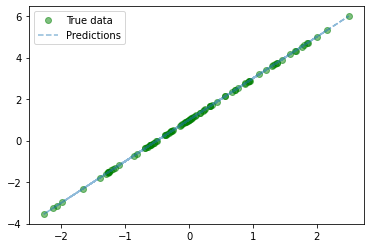

In [17]:
with torch.no_grad():
    if torch.cuda.is_available():
        pred = model(x_train.cuda()).cpu().data.numpy()
    else:
        pred = model(x_train).data.numpy()
    print(pred)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()